06_decision_trees

# Setup

In [135]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片
import matplotlib as mpl
import numpy as np
import pandas as pd 
import os

np.random.seed(42)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(image_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, image_id)

def show_image(img_path):
    plt.figure(figsize=(12, 6))
    lena = mpimg.imread(img_path) # 读取和代码处于同一目录下的 lena.png
    # 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
    lena.shape #(512, 512, 3)

    plt.imshow(lena) # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

# 决策树训练和可视化

In [136]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [137]:
iris.feature_names[2:], iris.target_names

(['petal length (cm)', 'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [138]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file=image_path("iris_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )


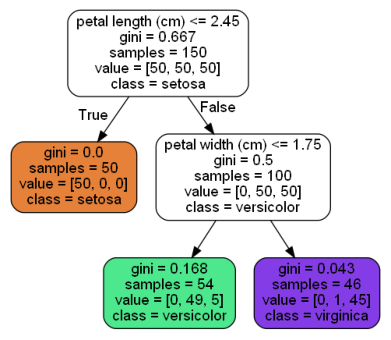

In [139]:
show_image(image_path("iris_tree.png"))

# 做出预测

In [162]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    """决策边界"""
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
        plt.xlabel("$x_1$", fontsize=14)
        plt.ylabel("$x_2$", fontsize=14)
    if legend:
        plt.legend(loc="upper left", fontsize=12)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris-virginica")

Text(4, 0.5, 'Deep=2')

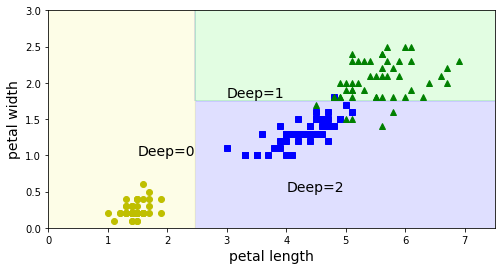

In [189]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3])
plt.text(1.5, 1, "Deep=0", fontsize=14)
plt.text(3, 1.8, "Deep=1", fontsize=14)
plt.text(4, 0.5, "Deep=2", fontsize=14)


对训练集细节的敏感：删除花瓣最宽的Iris-Versicolor的模型


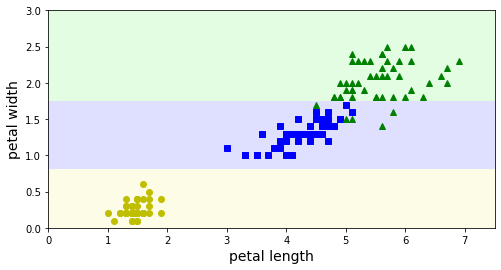

In [191]:
# 去除最宽的Versicolor鸢尾花
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, axes=[0, 7.5, 0, 3])

print("对训练集细节的敏感：删除花瓣最宽的Iris-Versicolor的模型")

# 估算类别概率

In [155]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [156]:
tree_clf.predict([[5, 1.5]])

array([1])

# CART训练算法

# 计算复杂度

# 基尼不纯度还是信息熵

# 正则化超参数

使用 min_simples_leaf 正则化|


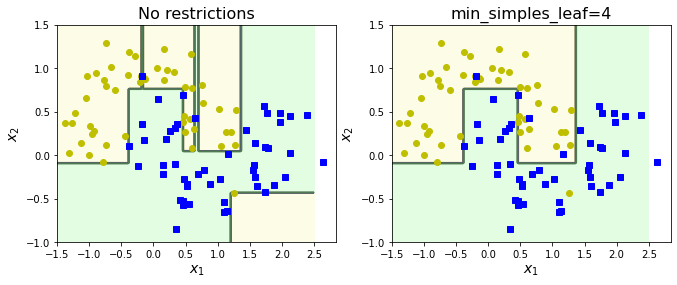

In [145]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_simples_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=16)

print("使用 min_simples_leaf 正则化|")
plt.show()

# 不稳定性

In [166]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [174]:
# 最宽的花瓣（Versicolor）
(X[:, 1][y == 1].max())

1.8

In [180]:
(X[:, 1] != 1.8) | (y==0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,

In [185]:
# 去除最宽的Versicolor鸢尾花
# width == 1.8 and y != 2  ==> False  (vatosa width<1.8)
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

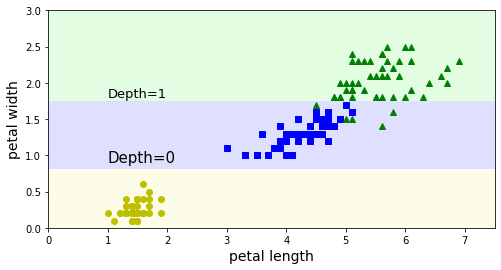

In [187]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
# plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
# plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

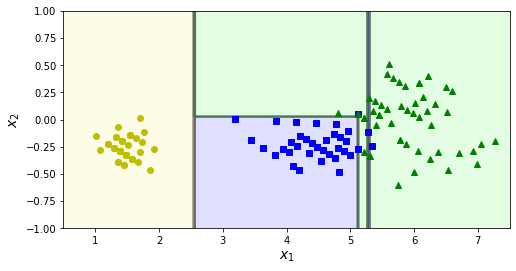

In [194]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

In [195]:
rotation_matrix

array([[ 0.93969262, -0.34202014],
       [ 0.34202014,  0.93969262]])

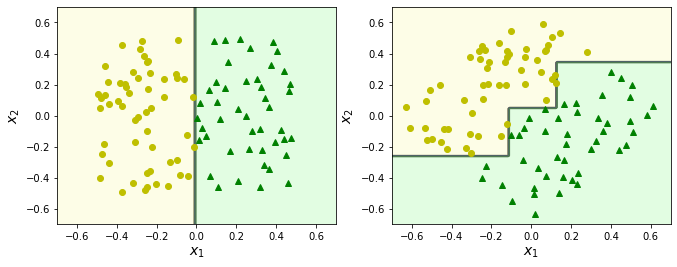

In [196]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

In [197]:
angle

0.7853981633974483

# 回归

In [81]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [83]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [123]:
export_graphviz(tree_reg,
                out_file=image_path("reg_tree.dot"),
                feature_names=["x1"],
#                 class_names=iris.target_names,
                rounded=True,
                filled=True
)

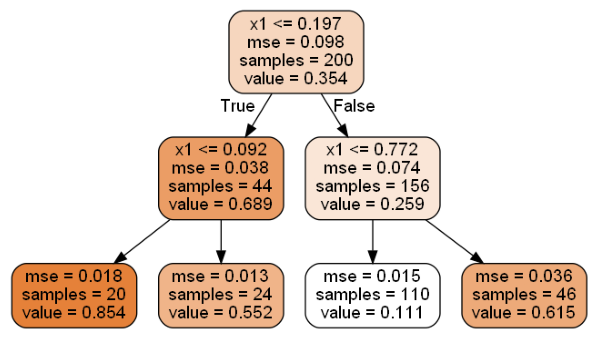

In [124]:
show_image(image_path("reg_tree.png"))

In [109]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regresion_predictions(reg, X, y, axes):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = reg.predict(x1)
    
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", label="$\hat{y}$")
    
    plt.xlabel("$x_1$", fontsize=14)
    plt.axis(axes)


两个决策回归模型的预测对比


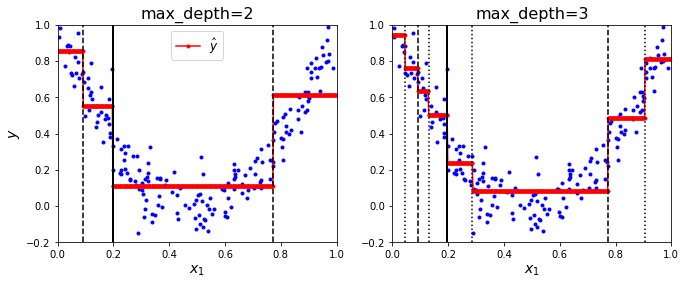

In [125]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regresion_predictions(tree_reg1, X, y, axes=[0, 1, -0.2, 1])
plt.plot([0.197, 0.197], [-0.2, 1], "k-", linewidth=2)
for xi in [0.092, 0.772]:
    plt.plot([xi, xi], [-0.2, 1], "k--")

plt.ylabel("$y$", fontsize=14)
plt.title("max_depth={}".format(tree_reg1.max_depth), fontsize=16)
plt.legend(loc="upper center", fontsize=12)

plt.subplot(122)
plot_regresion_predictions(tree_reg2, X, y, axes=[0, 1, -0.2, 1])
plt.plot([0.197, 0.197], [-0.2, 1], "k-", linewidth=2)
for xi in [0.092, 0.772]:
    plt.plot([xi, xi], [-0.2, 1], "k--")
for xi in (0.046, 0.13, 0.287, 0.904):
    plt.plot([xi, xi], [-0.2, 1], "k:")

plt.title("max_depth={}".format(tree_reg2.max_depth), fontsize=16)

print("两个决策回归模型的预测对比")
plt.show()

In [126]:
export_graphviz(tree_reg2,
               out_file=image_path("reg_tree_md3.dot"),
               feature_names=["x1"],
                rounded=True,
                filled=True)

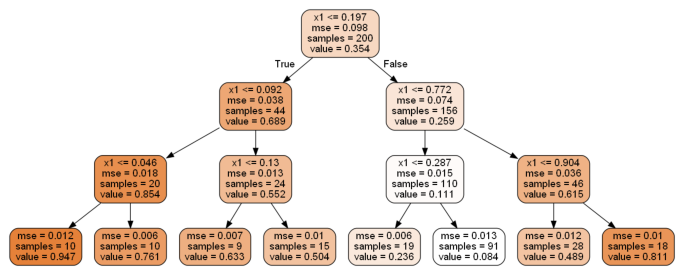

In [122]:
show_image(image_path("reg_tree_md3.png"))

对比决策树正则化


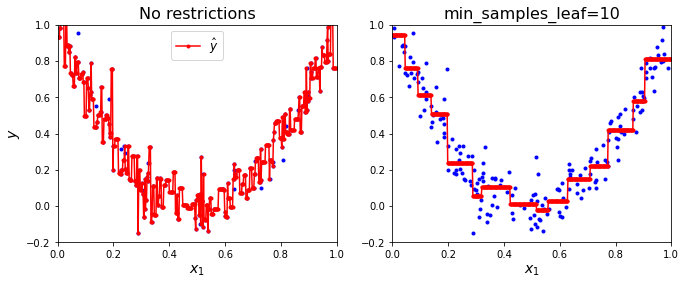

In [134]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regresion_predictions(tree_reg1, X, y, axes=[0, 1, -0.2, 1])
plt.ylabel("$y$", fontsize=14)
plt.title("No restrictions", fontsize=16)
plt.legend(loc="upper center", fontsize=12)

plt.subplot(122)
plot_regresion_predictions(tree_reg2, X, y, axes=[0, 1, -0.2, 1])
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=16)

print("对比决策树正则化")
plt.show()

# 练习

## 7. 为卫星数据集训练并微调一个决策树

a. 生成一个卫星数据集

In [203]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 拆分训练集和测试集

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. 使用交叉验证的网格搜索找到合适的超参数

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"max_leaf_nodes": list(range(2, 100)), "min_samples_split": [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              param_grid=params, 
                              verbose=1, 
                              cv=3)

grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [209]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [210]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [207]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_pred, y_test)

0.8695

In [221]:
y_pred.shape

(2000,)

## 8. 种植一片森林

a. 生产 1000 个训练集子集，每个子集随机挑选 100个实例

In [237]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000  # 1000 个训练集子集
n_instance = 100  # 100个实例
min_sets = []
rs = ShuffleSplit(n_splits=n_trees, train_size=n_instance, random_state=42)

for min_train_index, min_test_index in rs.split(X_train):
    X_min_train = X_train[min_train_index]
    y_min_train = y_train[min_train_index]
    
    min_sets.append((X_min_train, y_min_train))

每个子集上训练一个决策树，并评估

In [238]:
from sklearn.base import clone

accuracy_score_sets = []

# 评估器
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
# 训练模型并预测
for tree, (X_min_train, y_min_train) in zip(forest, min_sets):
    tree.fit(X_min_train, y_min_train)
    
    y_pred = tree.predict(X_test)

    accuracy_score_sets.append(accuracy_score(y_pred, y_test))

np.mean(accuracy_score_sets)

0.8054499999999999

用每个测试集实例，生成1000个决策树的预测，然后仅保留次数最频繁的预测。

In [232]:
np.empty([3, 5], dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [233]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [234]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [235]:
y_pred_majority_votes.reshape(-1).shape, y_pred_majority_votes, n_votes

((2000,),
 array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[951, 912, 963, ..., 919, 994, 602]]))

In [236]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872